In [58]:
import pandas as pd
pd.options.display.max_columns = 100

from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('data/x_train.csv')
df.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.598,682.153260,8272.770569,682.153260,984.32056,682.15326,23151.83800,23151.8380,23151.838,1,7,2.750000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.357,11.866026,3796.632686,11.866026,177.93991,73.74323,808.26230,21433.6840,21433.684,1,17,5.933333,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.467,2.761036,1397.103679,2.761036,187.99548,19.77734,418.23984,1953.6235,10842.464,1,20,5.063492,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.719,286.019320,9736.869034,286.019320,286.01932,286.01932,19187.71900,19187.7190,19187.719,1,8,4.250000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.514,2.798452,10066.803992,2.798452,1345.95280,662.57434,21903.78300,23164.5140,23164.514,1,19,3.710526,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105782 entries, 0 to 105781
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

With a quick glance over the dataset, we realize:

- TV1 (Trading Venue 1) is the largest market and the number of transaction on other trading venues (TV2, TV3 and TV4) is a much lower (25 000 NaN values on these markets).
- Large number of OMR with NaN Values and no '0' values in the dataset. We can definitely consider that the NaN value corresponds to a null value (No modification type events in the LOB).
- Same following with 'OTR', in which we fill NaN values by zeros.

This leads to the following corrections over the dataset.

In [40]:
df['OMR'].fillna(0, inplace=True)
df['OTR'].fillna(0, inplace=True)

In [46]:
df.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.598,682.153260,8272.770569,682.153260,984.32056,682.15326,23151.83800,23151.8380,23151.838,1,7,2.750000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.357,11.866026,3796.632686,11.866026,177.93991,73.74323,808.26230,21433.6840,21433.684,1,17,5.933333,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.467,2.761036,1397.103679,2.761036,187.99548,19.77734,418.23984,1953.6235,10842.464,1,20,5.063492,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.719,286.019320,9736.869034,286.019320,286.01932,286.01932,19187.71900,19187.7190,19187.719,1,8,4.250000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,0.000000,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.514,2.798452,10066.803992,2.798452,1345.95280,662.57434,21903.78300,23164.5140,23164.514,1,19,3.710526,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [54]:
df_test = pd.read_csv('data/y_train.csv')
df_test.head()

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Trader  86 non-null     object
 1   type    86 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [56]:
df.fillna(86400, inplace=True)

In [59]:
df.isna().sum()

Index                         0
Share                         0
Day                           0
Trader                        0
OTR                           0
OCR                           0
OMR                           0
min_time_two_events           0
mean_time_two_events          0
10_p_time_two_events          0
med_time_two_events           0
25_p_time_two_events          0
75_p_time_two_events          0
90_p_time_two_events          0
max_time_two_events           0
min_lifetime_cancel           0
mean_lifetime_cancel          0
10_p_lifetime_cancel          0
med_lifetime_cancel           0
25_p_lifetime_cancel          0
75_p_lifetime_cancel          0
90_p_lifetime_cancel          0
max_lifetime_cancel           0
NbTradeVenueMic               0
MaxNbTradesBySecond           0
MeanNbTradesBySecond          0
min_dt_TV1                    0
mean_dt_TV1                   0
med_dt_TV1                    0
min_dt_TV1_TV2                0
mean_dt_TV1_TV2               0
med_dt_T

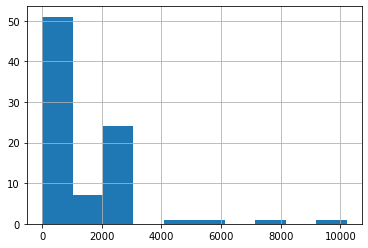

In [61]:
df['Trader'].value_counts().hist()